<a href="https://colab.research.google.com/github/heauming/heauming/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EC%8B%A4%EC%8A%B5_%EB%A0%88%EC%9D%B4%EC%BB%A4%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
#기본 패키지 불러오기
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#구글 드라이브 마운트하기(이미 되어있다면 건너뛴다)
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
la = pd.read_csv('/content/drive/MyDrive/dataset/Lakers.csv')

In [ ]:
la.head(5)

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN


In [ ]:
#3. 데이터 전처리하기
#3-1 시간 타입의 컬럼 정비하기
#현재 date컬럼이 정수로 되어 있음으로, 날짜 타입으로 변환한 후 두 컬럼을 합친다
la['date'] = la['date'].apply(str) #time이 obj형식임으로 int타입의 날짜를 str로 변환 후 합쳐준다
la['datetime'] = la['date'] + ' ' + la['time']
la.head()

#형성된 datetime칼럼을 날짜 타입으로 바꿔준다(시계열 분석시 편리하기 때문)
la['datetime'] = pd.to_datetime(la['datetime'], format = '%Y%m%d %H:%M:%S')
la['date'] = pd.to_datetime(la['date'], format = '%Y%m%d')
la.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-10-28 12:00:00
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,2008-10-28 11:23:00


In [ ]:
#3-2 결측치 처리하기
#null이 존재하는 컬럼 확인하기
la.isnull().any(axis = 0) #player, result, type, x, y에 결측치가 존재한다
#그렇다면 칼럼의 특성마다 어떻게 null값을 처리할 것인가
#player, result, type은 object임으로 굳이 Null에 값을 채울 필요가 없다
#x, y 컬럼의 NaN: 그냥 둬도 되지만 0을 채워 넣어보자
#0을 채워 넣기 전에, 실제 데이터에 0이 존재하는지 확인
print(la.index[la['x'] == 0].tolist())
print(la.index[la['y'] == 0].tolist())
la.info()

[203, 3636, 4205, 4272, 4474, 9407, 13882, 13890, 14484, 14992, 16488, 16955, 22606, 23761, 30173, 33921, 34053, 34517]
[]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34624 entries, 0 to 34623
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       34624 non-null  datetime64[ns]
 1   opponent   34624 non-null  object        
 2   game_type  34624 non-null  object        
 3   time       34624 non-null  object        
 4   period     34624 non-null  int64         
 5   etype      34624 non-null  object        
 6   team       34624 non-null  object        
 7   player     29231 non-null  object        
 8   result     16888 non-null  object        
 9   points     34624 non-null  int64         
 10  type       24242 non-null  object        
 11  x          13067 non-null  float64       
 12  y          13067 non-null  float64       
 13  datetime   34624 non-null  datetime64[ns]
dtypes: datetime

In [ ]:
#x, y의 결측값에 0채워넣기
la['x'].fillna(0, inplace = True)
la['y'].fillna(0, inplace = True)
la.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-10-28 12:00:00
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,0.0,0.0,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,0.0,0.0,2008-10-28 11:23:00


##4.EDA & Visualizaion

###4-1. 홈 경기 대 원정 경기의 비율

In [ ]:
#날짜별로 홈 경기인지 원정경기인지 보려면?
la[['date', 'game_type']].groupby(['date', 'game_type']).sum()

,
date,game_type
2008-10-28,home
2008-10-29,away
2008-11-01,away
2008-11-05,home
2008-11-09,home
...,...
2009-04-07,away
2009-04-09,home
2009-04-10,away


In [ ]:
#reset_index 함수로 정리해주기
la[['date','game_type']].groupby(['date','game_type']).sum().reset_index()

,date,game_type
0,2008-10-28,home
1,2008-10-29,away
2,2008-11-01,away
3,2008-11-05,home
4,2008-11-09,home
...,...,...
73,2009-04-07,away
74,2009-04-09,home
75,2009-04-10,away
76,2009-04-12,home


In [ ]:
#홈 경기 대 원정 경기의 비율: 
#날짜별로 home/away 데이터가 중복되므로 처음 하나만 남기고 날려버려서 해결하는 방법도 있다
df1 = la.drop_duplicates(['date'], keep='first')
df1

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-10-28 12:00:00
416,2008-10-29,LAC,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-10-29 12:00:00
871,2008-11-01,DEN,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-11-01 12:00:00
1364,2008-11-05,LAC,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-11-05 12:00:00
1867,2008-11-09,HOU,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-11-09 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32345,2009-04-07,SAC,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-07 12:00:00
32782,2009-04-09,DEN,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-09 12:00:00
33280,2009-04-10,POR,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-10 12:00:00
33746,2009-04-12,MEM,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-12 12:00:00


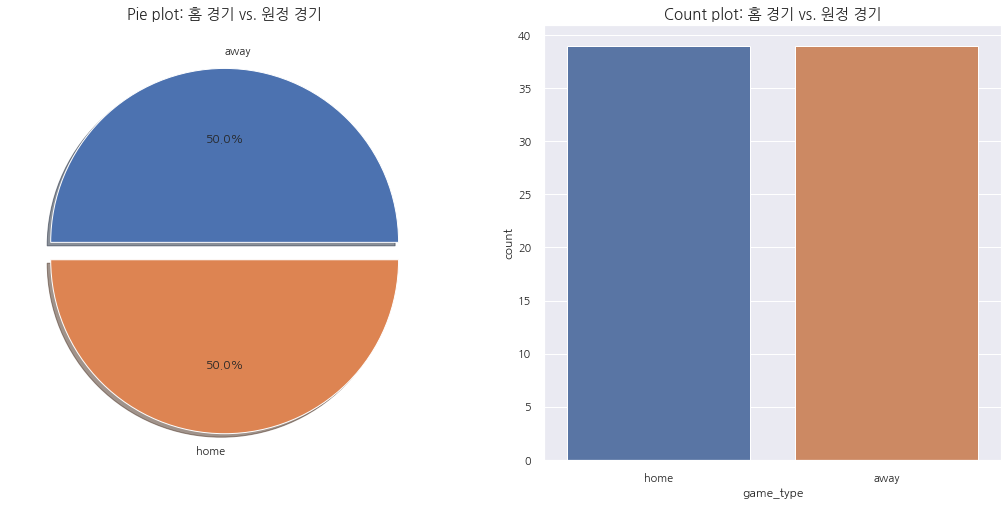

In [ ]:
#홈 경기 대 원정 경기의 비율: 그래프로 나타내기
f, ax = plt.subplots(1, 2, figsize=(18, 8))

#pie plot
df1['game_type'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot: 홈 경기 vs. 원정 경기', size = 15)
ax[0].set_ylabel('') #y 라벨 없애기

#count plot
sns.countplot('game_type', data=df1, ax=ax[1])
ax[1].set_title('Count plot: 홈 경기 vs. 원정 경기', size = 15)

plt.show()

###4-2.경기에서 발생한 행동 유형 확인하기

In [ ]:
#몇개의 행동 유형이 있는가?
print('Etype: ', la['etype'].unique())

Etype:  ['jump ball' 'shot' 'rebound' 'foul' 'free throw' 'turnover' 'timeout'
 'sub' 'violation' 'ejection']


In [ ]:
#모든경기를 포함해서 각각의행동유형의 몇번 발생했는가?
la['etype'].value_counts()

shot          13108
rebound        7971
free throw     3780
foul           3417
sub            2891
turnover       2261
timeout         950
jump ball       131
violation       114
ejection          1
Name: etype, dtype: int64

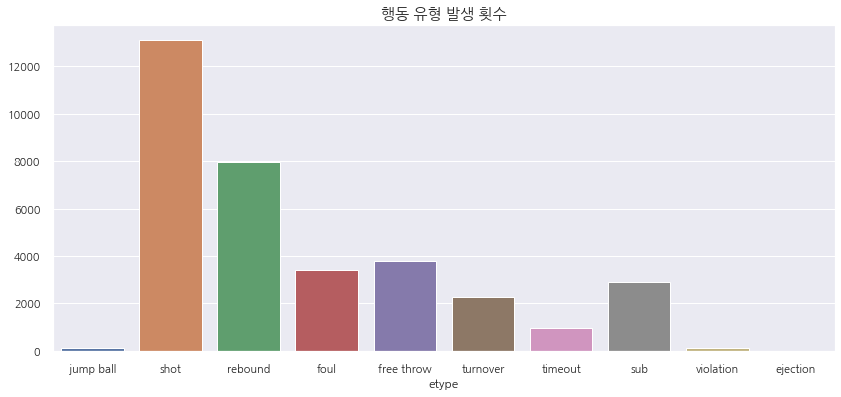

In [ ]:
#행동유형 발생 횟수 그래프로 나타내기
f, ax = plt.subplots(1, 1, figsize = (14, 6))

sns.countplot(x = la['etype'], ax = ax)
ax.set_title('행동 유형 발생 횟수', size = 15)
ax.set_ylabel('')
plt.show()

In [ ]:
#특정 쿼터에서 많이 발생한 행동이 있을까?
#groupby를 사용해서 각 쿼터별로 각각의 행동이 몇 회 발생했는지 세 보기
df2 = la.groupby(['period', 'etype']).size().reset_index().pivot(columns = 'period', index = 'etype', values = 0)
df2

period,1,2,3,4,5
etype,,,,,
ejection,NaN,NaN,1.0,NaN,NaN
foul,665.0,887.0,848.0,1002.0,15.0
free throw,666.0,944.0,949.0,1205.0,16.0
jump ball,85.0,16.0,7.0,21.0,2.0
rebound,2023.0,1966.0,1986.0,1976.0,20.0
shot,3500.0,3279.0,3232.0,3063.0,34.0
sub,555.0,915.0,584.0,832.0,5.0
timeout,166.0,266.0,185.0,327.0,6.0
turnover,547.0,571.0,533.0,608.0,2.0
